# GMM Anomaly Detection in contextual tokens

In [1]:
import sys
sys.path.append('../')

import pickle
import random
import numpy as np
import matplotlib.pyplot as plt

import src.sentpair_generator
import src.anomaly_model

%matplotlib inline
%load_ext autoreload
%autoreload 2

## Pick random subset of sentences

In [2]:
with open('../data/bnc.pkl', 'rb') as f:
  bnc_sentences = pickle.load(f)

random.seed(12345)
bnc_sentences = random.sample(bnc_sentences, 1000)

## Plot of GMM score at each layer and word

In [3]:
model = src.anomaly_model.AnomalyModel(bnc_sentences)

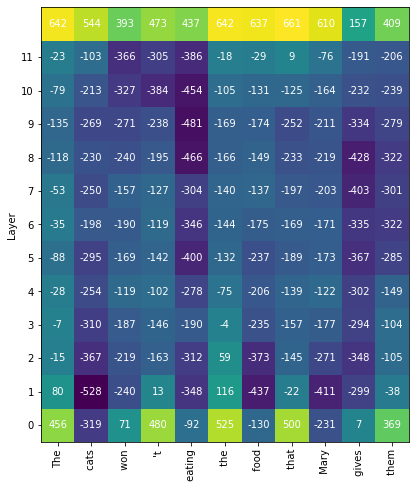

In [4]:
def all_layer_scores(sent):
  tokens, all_layer = model.gmm_score([sent])
  tokens = tokens[0]
  all_layer = all_layer[0]
  plt.figure(figsize=(8, 8))
  plt.imshow(all_layer, origin='lower')
  plt.xticks(range(len(tokens)), tokens, rotation='vertical')
  plt.yticks(range(12), range(12))
  plt.ylabel('Layer')
  for (j,i),label in np.ndenumerate(all_layer):
    plt.text(i, j, int(label), ha='center', va='center', color='white')
  plt.show()

all_layer_scores("The cats won't eating the food that Mary gives them.")

## Evaluate on all datasets

In [5]:
sentgen = src.sentpair_generator.SentPairGenerator()

In [6]:
def process_sentpair_dataset(taskname, category, sent_pairs):
  # For debugging, take first 100
  sent_pairs = sent_pairs[:100]
  
  scores = []
  for layer in range(13):
    results = model.eval_sent_pairs(sent_pairs, layer)
    score = sum(results) / len(results)
    scores.append(score)
    print(layer, score)
    
  plt.plot(scores)
  plt.ylim((0, 1))
  plt.xticks(range(0, 13))
  plt.title(f"{category} - {taskname}")
  plt.xlabel('Layer')
  plt.ylabel('GMM Accuracy')
  plt.show()

0 0.47
1 0.56
2 0.75
3 0.85
4 0.9
5 0.92
6 0.93
7 0.94
8 0.92
9 0.91
10 0.94
11 0.97
12 0.78


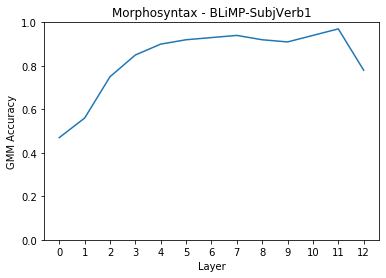

0 0.43
1 0.57
2 0.78
3 0.85
4 0.94
5 0.95
6 0.98
7 0.93
8 0.94
9 0.86
10 0.98
11 0.96
12 0.72


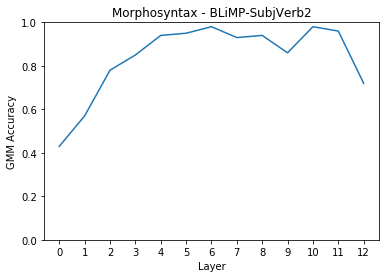

0 0.58
1 0.54
2 0.6
3 0.74
4 0.91
5 0.88
6 0.91
7 0.95
8 0.94
9 0.99
10 1.0
11 0.99
12 0.89


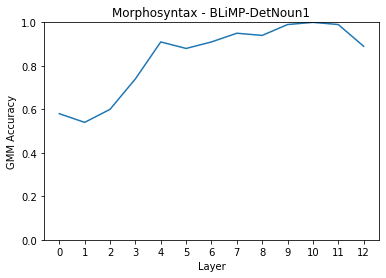

0 0.53
1 0.53
2 0.63
3 0.78
4 0.97
5 0.98
6 0.96
7 0.94
8 0.96
9 1.0
10 0.99
11 0.98
12 0.91


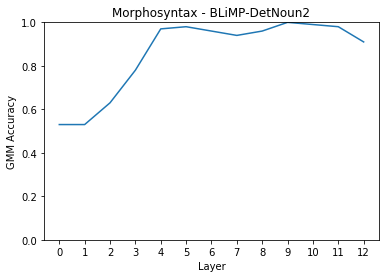

0 0.69
1 0.63
2 0.54
3 0.54
4 0.6
5 0.69
6 0.63
7 0.73
8 0.63
9 0.65
10 0.78
11 0.79
12 0.56


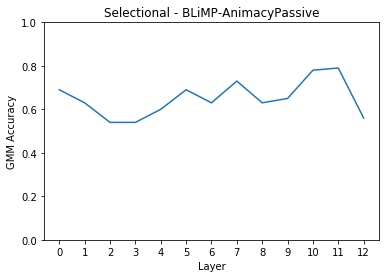

0 0.22
1 0.3
2 0.35
3 0.39
4 0.43
5 0.66
6 0.72
7 0.68
8 0.75
9 0.75
10 0.76
11 0.76
12 0.61


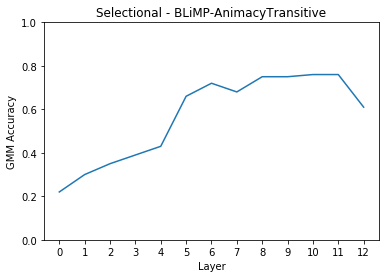

0 0.7
1 0.5285714285714286
2 0.45714285714285713
3 0.6571428571428571
4 0.8
5 0.9285714285714286
6 0.9857142857142858
7 0.9428571428571428
8 0.9285714285714286
9 0.9571428571428572
10 0.9285714285714286
11 0.9571428571428572
12 0.8142857142857143


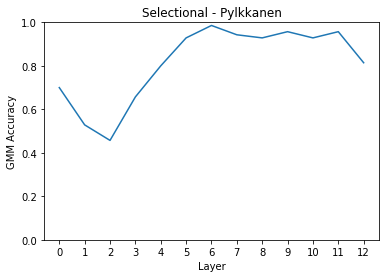

0 0.4666666666666667
1 0.36666666666666664
2 0.43333333333333335
3 0.4666666666666667
4 0.6
5 0.6333333333333333
6 0.6
7 0.7333333333333333
8 0.7333333333333333
9 0.8
10 0.8
11 0.8333333333333334
12 0.9333333333333333


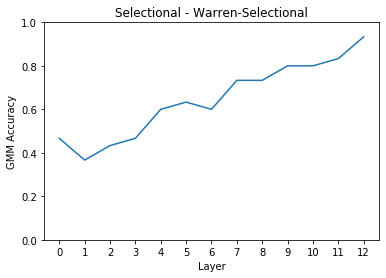

0 0.36666666666666664
1 0.3333333333333333
2 0.43333333333333335
3 0.4666666666666667
4 0.5333333333333333
5 0.6
6 0.6
7 0.5666666666666667
8 0.5666666666666667
9 0.5
10 0.6
11 0.6
12 0.6666666666666666


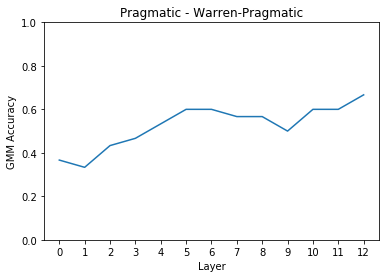

0 0.5294117647058824
1 0.47058823529411764
2 0.4117647058823529
3 0.5
4 0.47058823529411764
5 0.5294117647058824
6 0.6470588235294118
7 0.6176470588235294
8 0.5
9 0.6176470588235294
10 0.6470588235294118
11 0.5588235294117647
12 0.4411764705882353


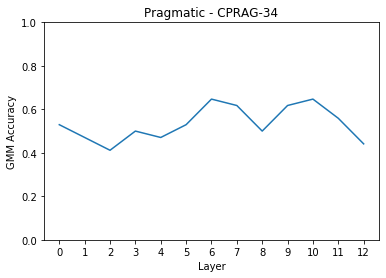

0 0.5454545454545454
1 0.5681818181818182
2 0.45454545454545453
3 0.45454545454545453
4 0.5
5 0.5454545454545454
6 0.5681818181818182
7 0.5227272727272727
8 0.45454545454545453
9 0.5
10 0.5
11 0.4318181818181818
12 0.4090909090909091


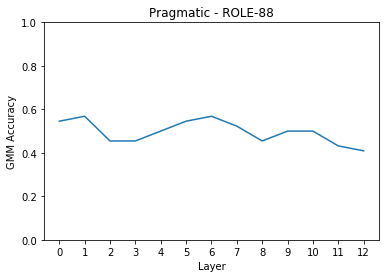

In [7]:
for taskname, sent_pair_set in sentgen.get_all_datasets().items():
  process_sentpair_dataset(taskname, sent_pair_set.category, sent_pair_set.sent_pairs)